# **OpenCV CONTOURS**
## GEREKLİ KÜTÜPHANELER

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Resim gösterimi için bir metod oluşturalım

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

Bir resim çağırıp BGR formatından RGB formatına dönüştürüg görüntüleyelim

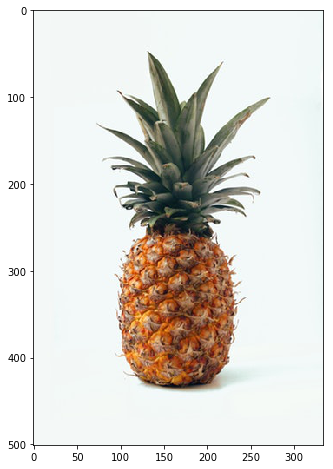

In [3]:
# load the image
img = cv2.imread('images/pine_apple.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

Resmi blurlaştıralım

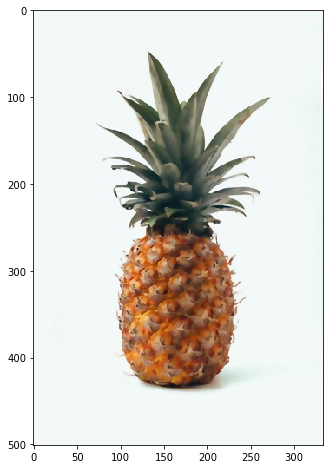

In [4]:
# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
display(img_blur)

Gri tona dönüştürelim

In [5]:
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)

Eşik değer uygulayıp resmi tekrar görüntüleyelim

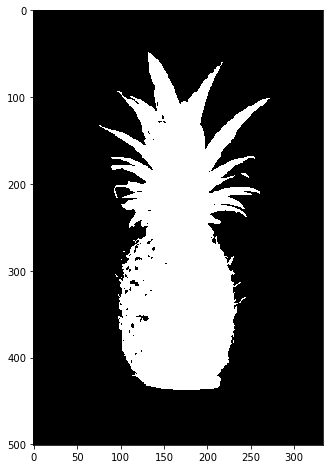

In [6]:
# Apply the thresholding  
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+60, a, cv2.THRESH_BINARY_INV)
display(thresh, cmap = 'gray')

**findContours** metodunu uygulayalım

In [7]:
# Find the contour of the figure 
image, contours, hierarchy = cv2.findContours(thresh, 
                                              mode = cv2.RETR_TREE, 
                                              method = cv2.CHAIN_APPROX_SIMPLE)

Contour bölgelerini sıralayıp resmi görüntüleyelim

In [8]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

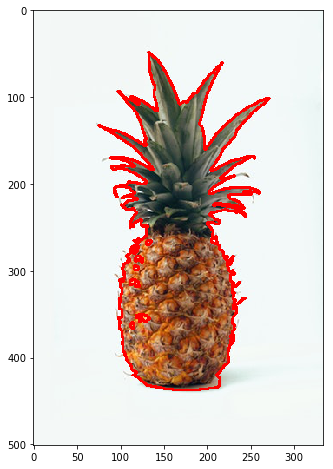

In [9]:
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
display(img_copy)

In [10]:
# The first order of the contours
c_0 = contours[0]
c_0

array([[[132,  48]],

       [[133,  49]],

       [[133,  59]],

       ..., 
       [[140,  54]],

       [[139,  54]],

       [[133,  48]]], dtype=int32)

Contour ile sınırlandırdığımız bölgenin orta noktasını bulma

In [11]:
# image moment
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['m12', 'nu03', 'm21', 'nu02', 'mu11', 'mu21', 'nu30', 'nu11', 'mu20', 'mu12', 'm11', 'nu12', 'm03', 'nu21', 'mu02', 'mu30', 'm02', 'm10', 'm00', 'm30', 'm20', 'mu03', 'm01', 'nu20'])


In [12]:
# The area of contours 
print("1st Contour Area : ", cv2.contourArea(contours[0]))
print("2nd Contour Area : ", cv2.contourArea(contours[1]))
print("3rd Contour Area : ", cv2.contourArea(contours[2]))

1st Contour Area :  37554.5
2nd Contour Area :  75.0
3rd Contour Area :  54.0


In [13]:
# The length of contours 
print("1st Contour Arc Length (Closed): ", cv2.arcLength(contours[0], closed = True))
print("1st Contour Arc Length (Open): ", cv2.arcLength(contours[0], closed = False))

1st Contour Arc Length (Closed):  2473.3190953731537
1st Contour Arc Length (Open):  2472.3190953731537


In [14]:
# The centroid point
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

In [15]:
# The extreme points
l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])

pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

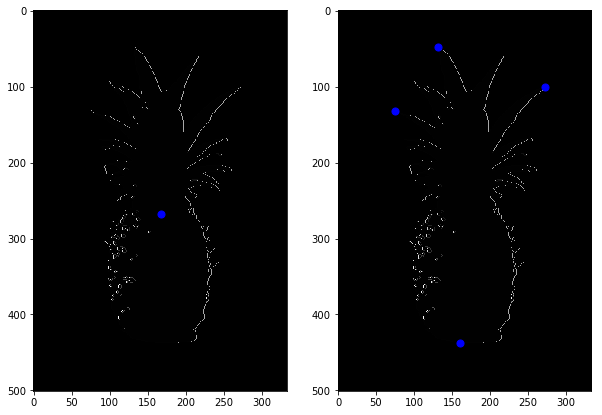

In [17]:
# Plot the points
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.scatter([cx], [cy], c = 'b', s = 50)

plt.subplot(1, 2, 2)
plt.imshow(image, cmap = 'gray')
plt.scatter(xcor, ycor, c = 'b', s = 50)

# Contour bölgesini çerçeveleyelim

In [18]:
# The first order of contours
c_0 = contours[0]

# Get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)

# Draw a rectangle with the points
img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

In [19]:
# Get the 4 points of the bounding rectangle with the minimum area
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')

# Draw a contour with the points 
img_copy = img.copy()
img_box_2 = cv2.drawContours(img_copy, contours = [box], 
                           contourIdx = -1, 
                           color = (255, 0, 0), thickness = 2)

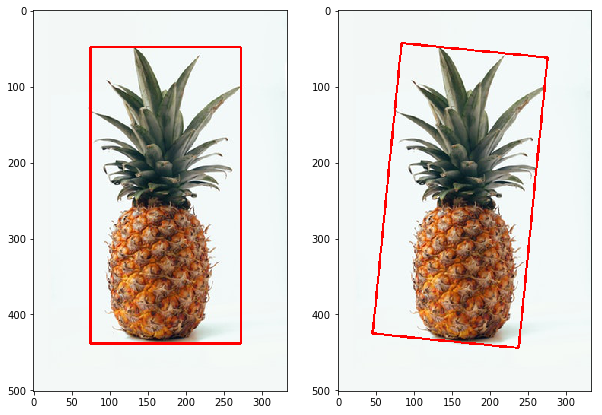

In [20]:

plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(img_box)
plt.subplot(1, 2, 2); plt.imshow(img_box_2)

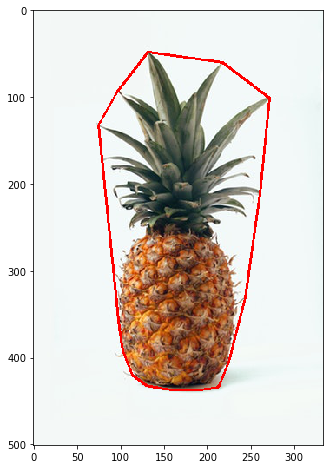

In [21]:

# Detect the convex contour
hull = cv2.convexHull(c_0)

img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, contours = [hull], contourIdx = 0, 
                            color = (255, 0, 0), thickness = 2)
display(img_hull)

# Bir resmi arka plan temizleyerek bir başka resme ekleme

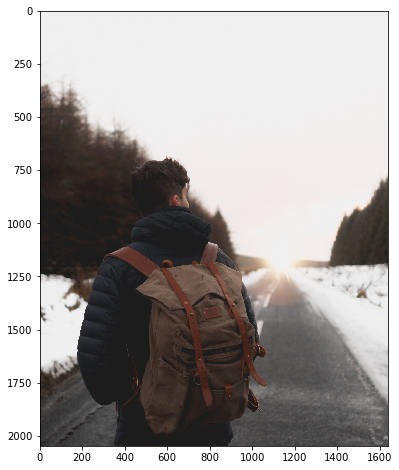

In [22]:
backpacker = cv2.imread('images/backpacker.jpg')
backpacker = cv2.cvtColor(backpacker, cv2.COLOR_BGR2RGB)
display(backpacker)

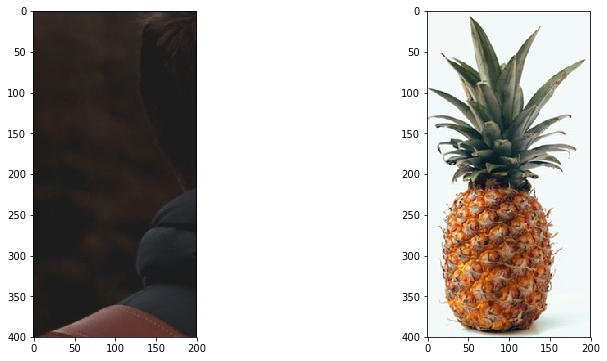

In [23]:
# Crop the small image and the region of interest (roi)
img_2 = img[40:440, 80:280]
roi = backpacker[750:1150, 300:500]

plt.figure(figsize = (10, 6))
plt.subplot(1, 3, 1); plt.imshow(roi)
plt.subplot(1, 3, 3); plt.imshow(img_2)

# Maske uygulayarak diğer resme ekleyelim

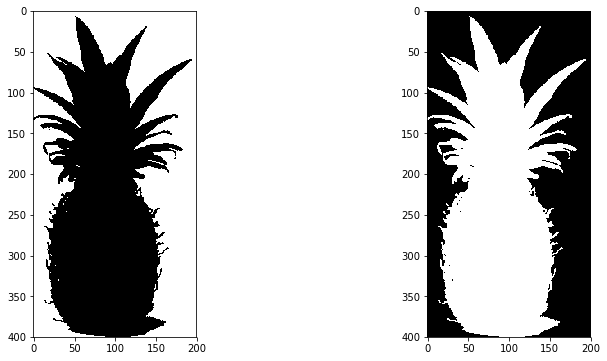

In [24]:
# Creating the mask for the roi and small image
img_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(img_gray, 254/2+100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.figure(figsize = (10, 6))
plt.subplot(1, 3, 1); plt.imshow(mask, cmap = 'gray')
plt.subplot(1, 3, 3); plt.imshow(mask_inv, cmap = 'gray')

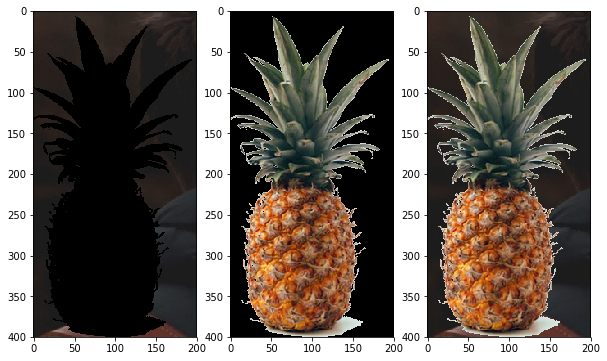

In [25]:
# Masking 
img_bg = cv2.bitwise_and(roi, roi, mask = mask)
img_fg = cv2.bitwise_and(img_2, img_2, mask = mask_inv)
dst = cv2.add(img_fg, img_bg)

plt.figure(figsize = (10, 6))
plt.subplot(1, 3, 1); plt.imshow(img_bg)
plt.subplot(1, 3, 2); plt.imshow(img_fg)
plt.subplot(1, 3, 3); plt.imshow(dst)

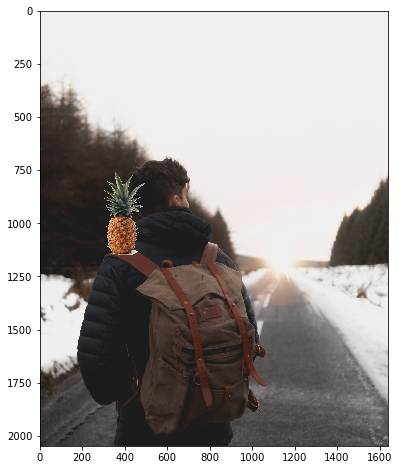

In [26]:
# Final output
backpacker[750:1150, 300:500] = dst
display(backpacker)

# Faydalı olması dileğiyle